In [1]:
from qa_qc_lib.qa_qc_gis import QA_QC_GIS_second, QA_QC_GIS_first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
kern = pd.read_excel('qa_qc_lib/data/Керн1.xlsx')
depth = kern['Глубина отбора образца после привязки к ГИС, м'].to_numpy()
poro = kern['Открытая пористость по воде, Кп, %'].to_numpy()
lithology = kern['Литологическое описание'].to_numpy()
poroeff = kern['Эффективная пористость, Кп эф, %'].to_numpy()
perm = kern['Газопроницаемость параллельно напластованию, Кпр, мД'].to_numpy()

Тестирование качества увязки литологии по ГИС и литологии по керну

Процент совпавших литотипов по ГИС и по керну равен  90.54325955734407 %
Оранжевыми точками отмечены глубины, в которых литология не увязана. В литологии по керну: песчаник - ф, алевролит - з, аргиллит/глина - ж


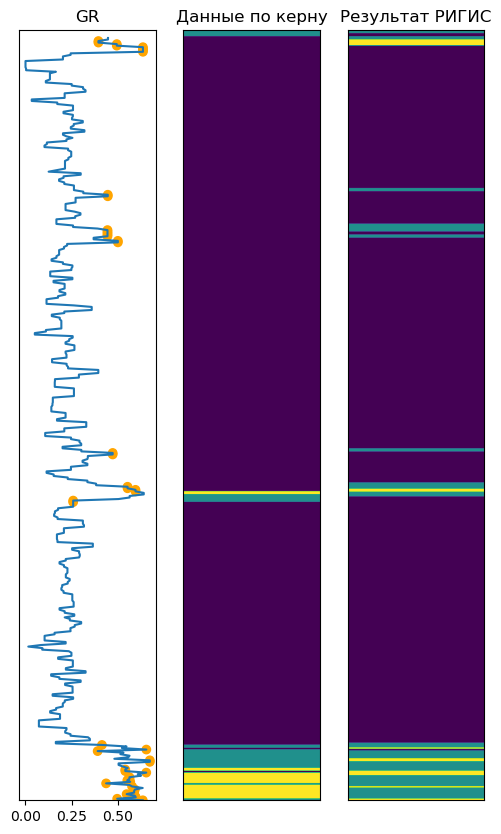


Тестирование на сходство максимальных отметок глубин по отбивкам и по ГИС

Максимальная глубина по отбивке 2142, максимальная глубина по ГИС 2468.1. Тест пройден

Тестирование качества увязки открытой пористости, эффективной пористости и проницаемости по керну с этими же свойствами по РИГИС



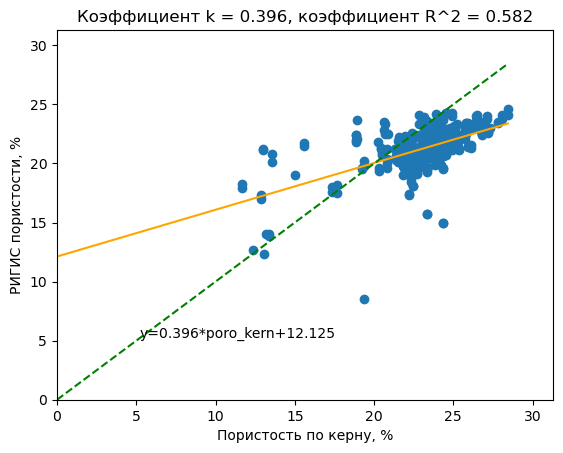


В файле с керном нет таких глубин, на которых были бы данные по эффективной пористости и по открытой пористости



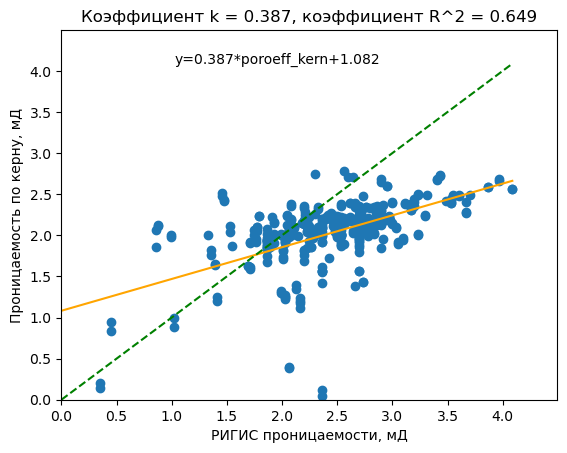

Перекрытия интервалов в данных нет
В каротаже gr пропуски на следующих глубинах:
2090.41 - 2090.7
В каротаже rhob пропуски больше 0.5м. 

В ГИС и в файле с отбивками глубина измеряется в метрах


In [3]:
las_path = 'qa_qc_lib/data/9281PL.las'
qaqcc = QA_QC_GIS_second(las_path, (2083, 2142), poro_open=poro, perm=perm, poro_eff=poroeff, lithology=lithology, depth=depth)
list_of_tests = qaqcc.get_list_of_tests()
qaqcc.start_tests(list_of_tests)

In [4]:
list_of_tests

['test_lithology',
 'test_max_value_gis',
 'test_properties',
 'test_repeat',
 'test_saturation',
 'test_skipped_gis',
 'test_units']


Тестирование качества увязки открытой пористости, эффективной пористости и проницаемости по керну с этими же свойствами по РИГИС



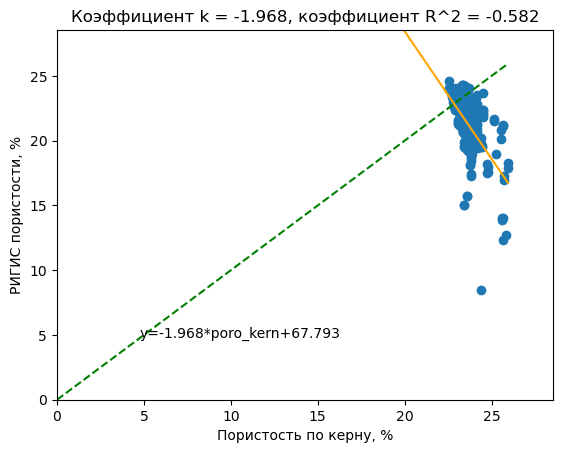


В файле с керном нет таких глубин, на которых были бы данные по эффективной пористости и по открытой пористости



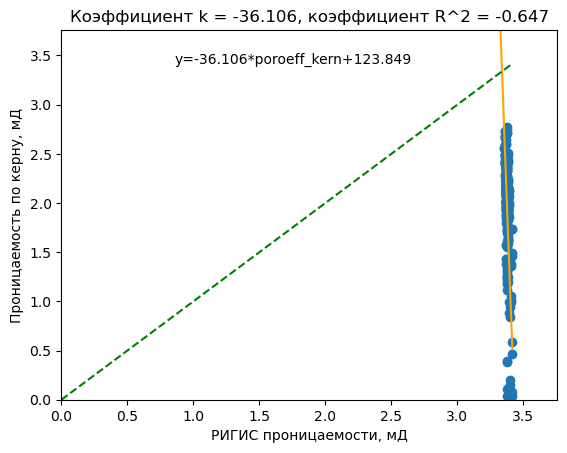

In [5]:
def poro_model(x):
    return 10*x+1
def poroeff_model(x):
    return 10*x+1
def perm_model(x):
    return 10*x+1
qaqcc.test_properties(poro_model=poro_model, poroeff_model=poroeff_model, perm_model=perm_model, gis_type1='rhob')

In [7]:
gis = ['1', '2']

In [12]:
gis1={'1': '11',
     '2': '22'}

In [13]:
[gis1[x] for x in gis]

['11', '22']

In [35]:
names = ''
for i in qaqcc.las.columns:
    names = names + i + ' '
names = names + 'GR_1' + 'GR1'
re.findall('GR\d', names)
re.findall('GR\w\d', names)

['GR_1']

In [21]:
names

"FACIESNP FACIES FLUID PALEOLITHOLOGY LITHOLOGY NOB LOB KGL1 KPR1 KPEF1 KP1 KN1 VSH PERMEABILITY EFFPOROSITY POROSITY GR R27PC_46PH R27PC_46PH_TRANS RHOB SOIL TRUESTRATIGRAPHICTHICKNESS1 TRUEVERTICALTHICKNESS1 FLAG FACIES_TEST ONE-WAYTIME1 PORO0 PORO27 PORO20 PORO19 PORO9 ZONELOGLINKEDTO'TOPS2016' "

In [12]:
qaqcc.las.columns

Index(['FACIESNP', 'FACIES', 'FLUID', 'PALEOLITHOLOGY', 'LITHOLOGY', 'NOB',
       'LOB', 'KGL1', 'KPR1', 'KPEF1', 'KP1', 'KN1', 'VSH', 'PERMEABILITY',
       'EFFPOROSITY', 'POROSITY', 'GR', 'R27PC_46PH', 'R27PC_46PH_TRANS',
       'RHOB', 'SOIL', 'TRUESTRATIGRAPHICTHICKNESS1', 'TRUEVERTICALTHICKNESS1',
       'FLAG', 'FACIES_TEST', 'ONE-WAYTIME1', 'PORO0', 'PORO27', 'PORO20',
       'PORO19', 'PORO9', 'ZONELOGLINKEDTO'TOPS2016''],
      dtype='object')

In [6]:
las_path = 'qa_qc_lib/data/9281PL.las'
qaqc = QA_QC_GIS_first(las_path = las_path)

In [10]:
list_of_tests = qaqc.get_list_of_tests()
qaqc.start_tests(list_of_tests)

True
True
